<a href="https://colab.research.google.com/github/serena-alampi/ASL_Detection/blob/main/ASL_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/american-sign-language-letters-voc.zip -d /content/

Archive:  /content/american-sign-language-letters-voc.zip
   creating: /content/voc/
  inflating: /content/voc/00_LINK    
  inflating: /content/voc/A0_jpg.rf.292a080422ba984985192f413101af41.jpg  
  inflating: /content/voc/A0_jpg.rf.292a080422ba984985192f413101af41.xml  
  inflating: /content/voc/A0_jpg.rf.a79ace20ea42b8f94360cef8aaec4030.jpg  
  inflating: /content/voc/A0_jpg.rf.a79ace20ea42b8f94360cef8aaec4030.xml  
  inflating: /content/voc/A0_jpg.rf.beea8a405220871911fb117e36526deb.jpg  
  inflating: /content/voc/A0_jpg.rf.beea8a405220871911fb117e36526deb.xml  
  inflating: /content/voc/A10_jpg.rf.470b1af0feaa190a2d29fcafd6fe747d.jpg  
  inflating: /content/voc/A10_jpg.rf.470b1af0feaa190a2d29fcafd6fe747d.xml  
  inflating: /content/voc/A11_jpg.rf.4126b388a474440c970d85a3b2a7bf09.jpg  
  inflating: /content/voc/A11_jpg.rf.4126b388a474440c970d85a3b2a7bf09.xml  
  inflating: /content/voc/A11_jpg.rf.bf055dc8a9a5a85bed0cc1f792c56a01.jpg  
  inflating: /content/voc/A11_jpg.rf.bf055dc8a9

In [ ]:
import os
import xml.etree.ElementTree as ET
import shutil
from sklearn.model_selection import train_test_split

# Percorsi
dataset_dir = '/content/voc'
images_dir = '/content/dataset/images'
labels_dir = '/content/dataset/labels'

# Classi
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

# Creazione directory
os.makedirs(f'{images_dir}/train', exist_ok=True)
os.makedirs(f'{images_dir}/val', exist_ok=True)
os.makedirs(f'{labels_dir}/train', exist_ok=True)
os.makedirs(f'{labels_dir}/val', exist_ok=True)

# Raccolta immagini
all_images = [f for f in os.listdir(dataset_dir) if f.endswith('.jpg')]

# Split train/val
train_imgs, val_imgs = train_test_split(all_images, test_size=0.2, random_state=42)

def convert_annotation(xml_file, label_path):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    w = int(root.find('size/width').text)
    h = int(root.find('size/height').text)

    lines = []
    for obj in root.iter('object'):
        cls = obj.find('name').text
        if cls not in classes:
            continue
        cls_id = classes.index(cls)

        xmlbox = obj.find('bndbox')
        xmin = float(xmlbox.find('xmin').text)
        xmax = float(xmlbox.find('xmax').text)
        ymin = float(xmlbox.find('ymin').text)
        ymax = float(xmlbox.find('ymax').text)

        x_center = (xmin + xmax) / 2.0 / w
        y_center = (ymin + ymax) / 2.0 / h
        bbox_width = (xmax - xmin) / w
        bbox_height = (ymax - ymin) / h

        lines.append(f"{cls_id} {x_center} {y_center} {bbox_width} {bbox_height}")

    with open(label_path, 'w') as f:
        f.write("\n".join(lines))

# Conversione e copia immagini
for img_set, set_name in zip([train_imgs, val_imgs], ['train', 'val']):
    for img_file in img_set:
        xml_file = img_file.replace('.jpg', '.xml')

        # Percorsi
        src_img = os.path.join(dataset_dir, img_file)
        src_xml = os.path.join(dataset_dir, xml_file)

        dst_img = os.path.join(images_dir, set_name, img_file)
        dst_label = os.path.join(labels_dir, set_name, img_file.replace('.jpg', '.txt'))

        shutil.copyfile(src_img, dst_img)
        convert_annotation(src_xml, dst_label)

print('Conversione completata ✅')

Conversione completata ✅


In [ ]:
data_yaml = """
train: /content/dataset/images/train
val: /content/dataset/images/val

nc: 24
names: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
"""

with open('/content/data.yaml', 'w') as f:
    f.write(data_yaml)


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17496, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 17496 (delta 2), reused 0 (delta 0), pack-reused 17491 (from 3)
Receiving objects: 100% (17496/17496), 16.59 MiB | 30.67 MiB/s, done.
Resolving deltas: 100% (11993/11993), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:0

In [ ]:
!python train.py --img 640 --batch 16 --epochs 50 --data /content/data.yaml --weights yolov5s.pt --cache --patience 10

Output streaming troncato alle ultime 5000 righe.
      22/49      4.63G    0.02211   0.009744    0.04276         34        640:  52% 45/87 [00:11<00:10,  4.17it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      22/49      4.63G    0.02193   0.009692    0.04265         30        640:  53% 46/87 [00:11<00:09,  4.31it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      22/49      4.63G    0.02175   0.009677    0.04247         36        640:  54% 47/87 [00:12<00:10,  3.90it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      22/49      4.63G    0.02165   0.

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source /content/dataset/images/val

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/dataset/images/val, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7074853 parameters, 0 gradients, 16.0 GFLOPs
image 1/346 /content/dataset/images/val/A0_jpg.rf.292a080422ba984985192f413101af41.jpg: 640x640 1 A, 11.6ms
image 2/346 /content/dataset/images/val/A16_jpg.rf.4792e25fdaf24e4180ae1a9c1513a39a.jpg: 640x640 1 A, 11.7ms
image 3/346 /content/dataset/images/val/A17_jpg.rf.e59e6baab9d6c91b09c3bca65404aed1.jpg: 

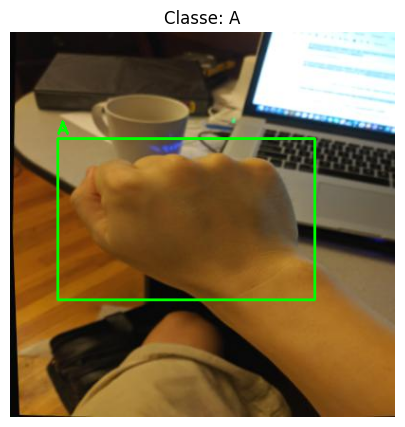

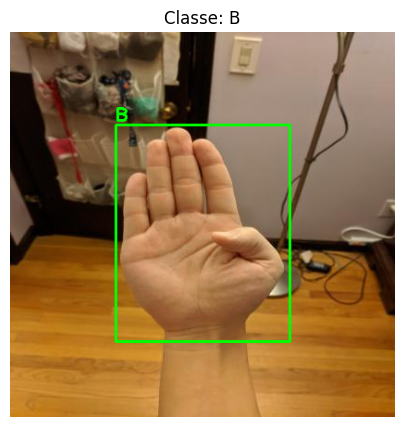

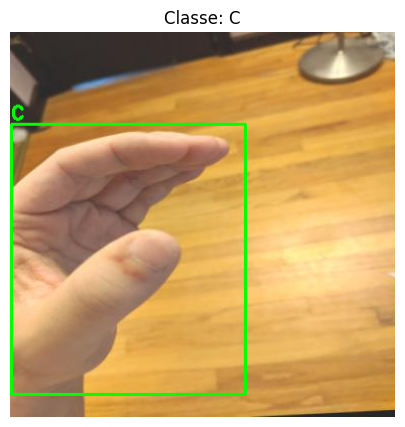

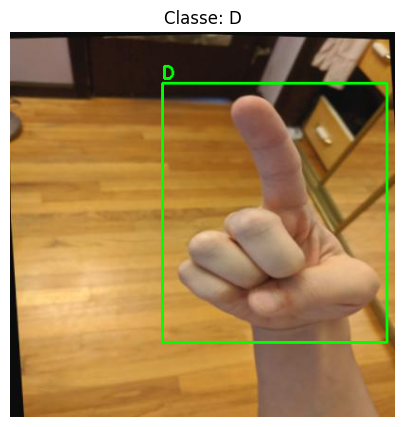

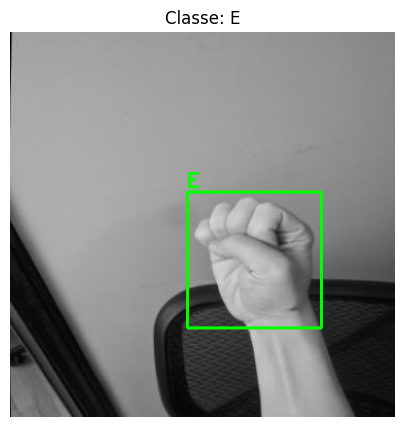

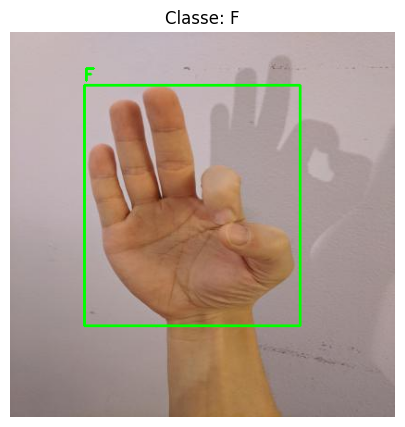

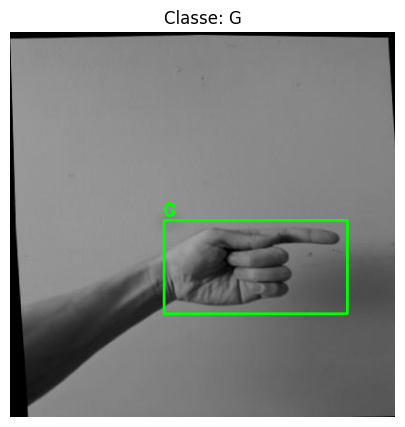

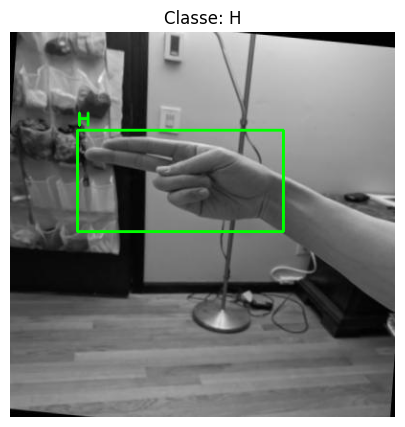

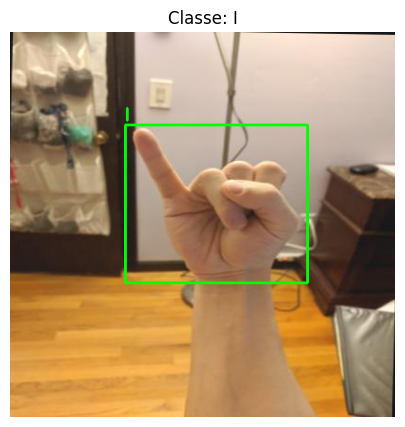

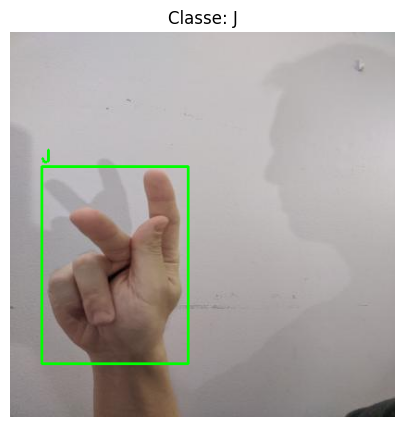

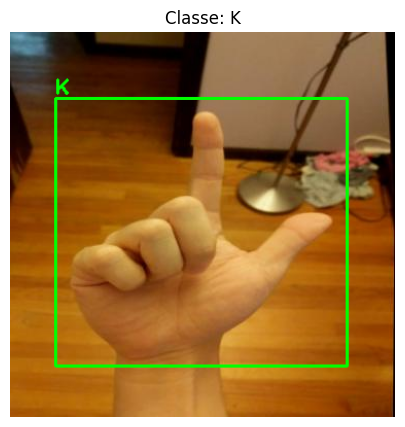

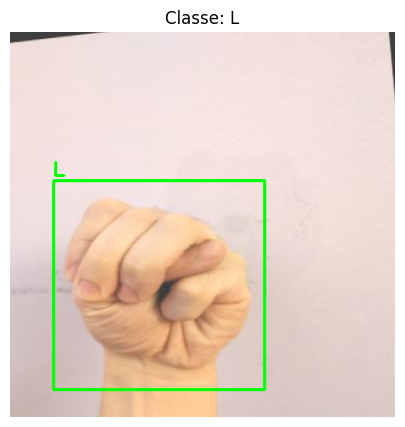

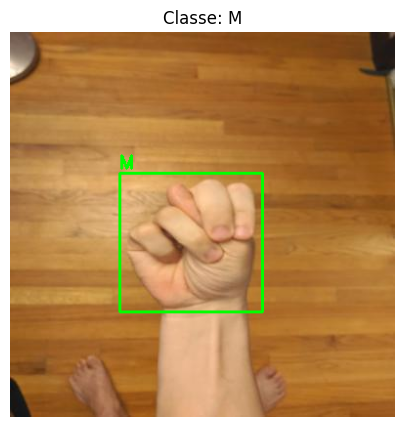

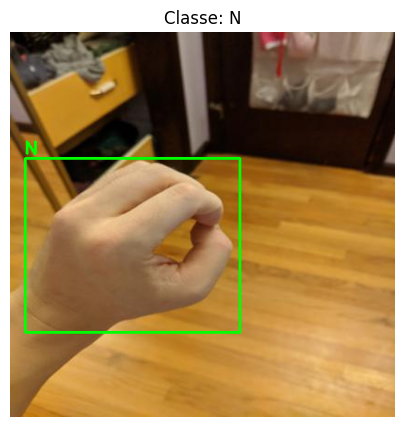

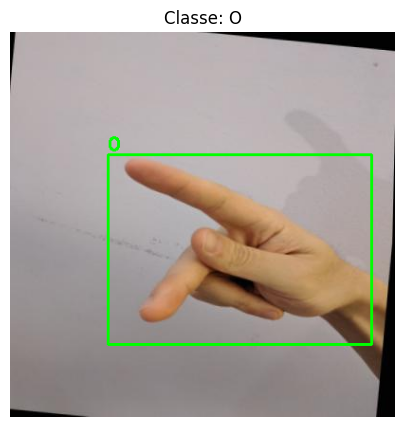

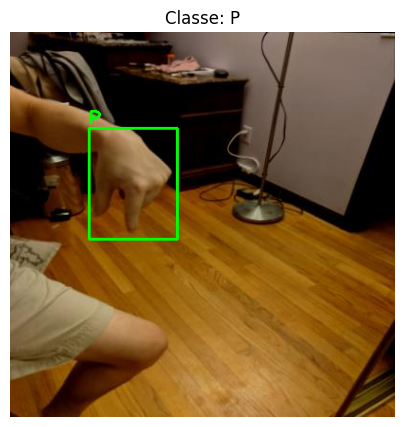

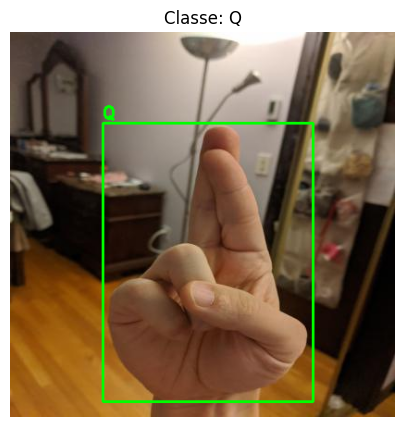

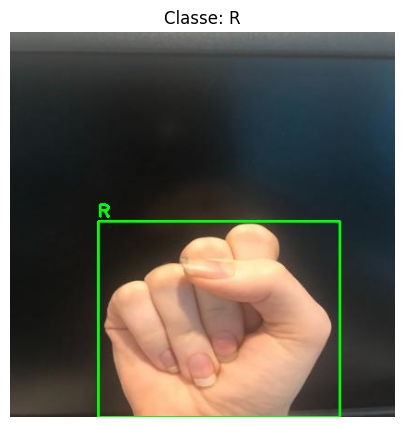

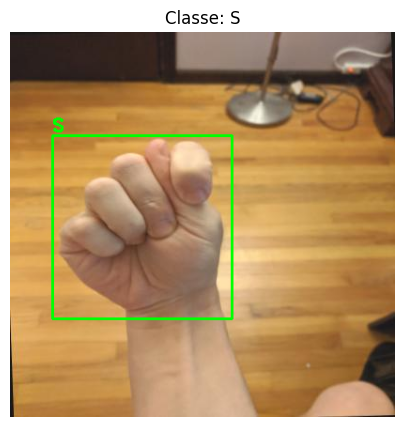

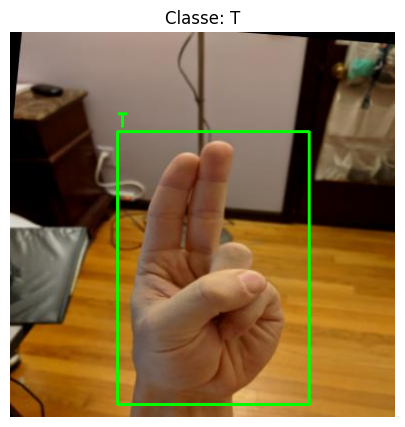

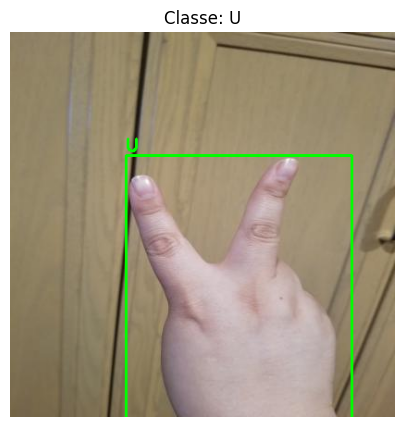

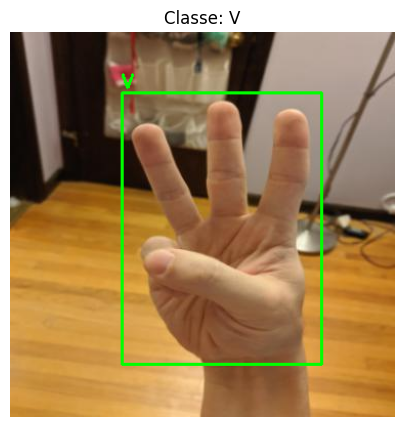

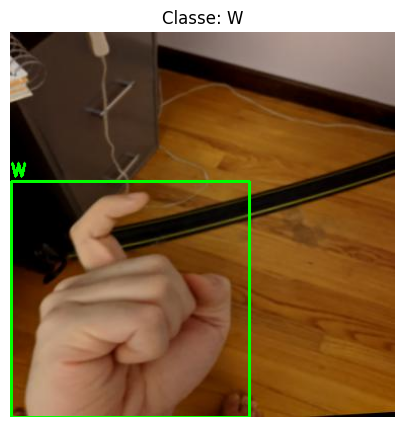

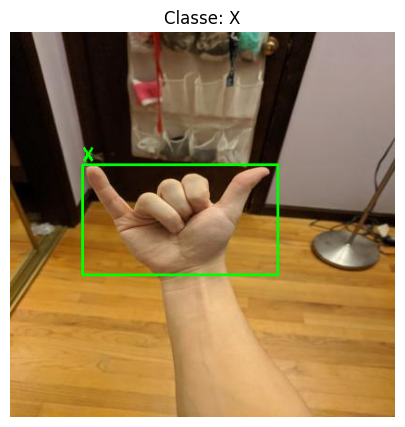

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Percorso alla cartella immagini e label
images_dir = "/content/dataset/images/train"    # o "val"
labels_dir = "/content/dataset/labels/train"    # o "val"

# Lista classi (in ordine, come nel file data.yaml)
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
               'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
               'Y', 'Z']

# Dizionario per tracciare se abbiamo già mostrato una classe
shown_classes = {}

def draw_yolo_bbox(image_path, label_path, class_names):
    image = cv2.imread(image_path)
    height, width = image.shape[:2]

    if not os.path.exists(label_path):
        return image, []

    boxes = []
    with open(label_path, "r") as f:
        for line in f:
            class_id, x_center, y_center, w, h = map(float, line.strip().split())
            class_id = int(class_id)

            x1 = int((x_center - w/2) * width)
            y1 = int((y_center - h/2) * height)
            x2 = int((x_center + w/2) * width)
            y2 = int((y_center + h/2) * height)

            boxes.append(class_id)

            color = (0, 255, 0)
            cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
            cv2.putText(image, class_names[class_id], (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    return image, boxes

# Scorri immagini e mostra solo una per classe
image_files = sorted(os.listdir(images_dir))
max_to_show = len(class_names)  # massimo 29
shown = 0

for img_file in image_files:
    img_path = os.path.join(images_dir, img_file)
    label_file = os.path.splitext(img_file)[0] + ".txt"
    label_path = os.path.join(labels_dir, label_file)

    img_with_boxes, box_classes = draw_yolo_bbox(img_path, label_path, class_names)

    # Se contiene almeno una classe non ancora mostrata
    for class_id in box_classes:
        class_name = class_names[class_id]
        if class_name not in shown_classes:
            # Mostra immagine
            plt.figure(figsize=(6, 5))
            plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
            plt.title(f"Classe: {class_name}")
            plt.axis('off')
            plt.show()

            shown_classes[class_name] = True
            shown += 1
            break  # vai alla prossima immagine

    if shown >= max_to_show:
        break